![Taming the TwitterVerse.png](<attachment:Taming the TwitterVerse.png>)
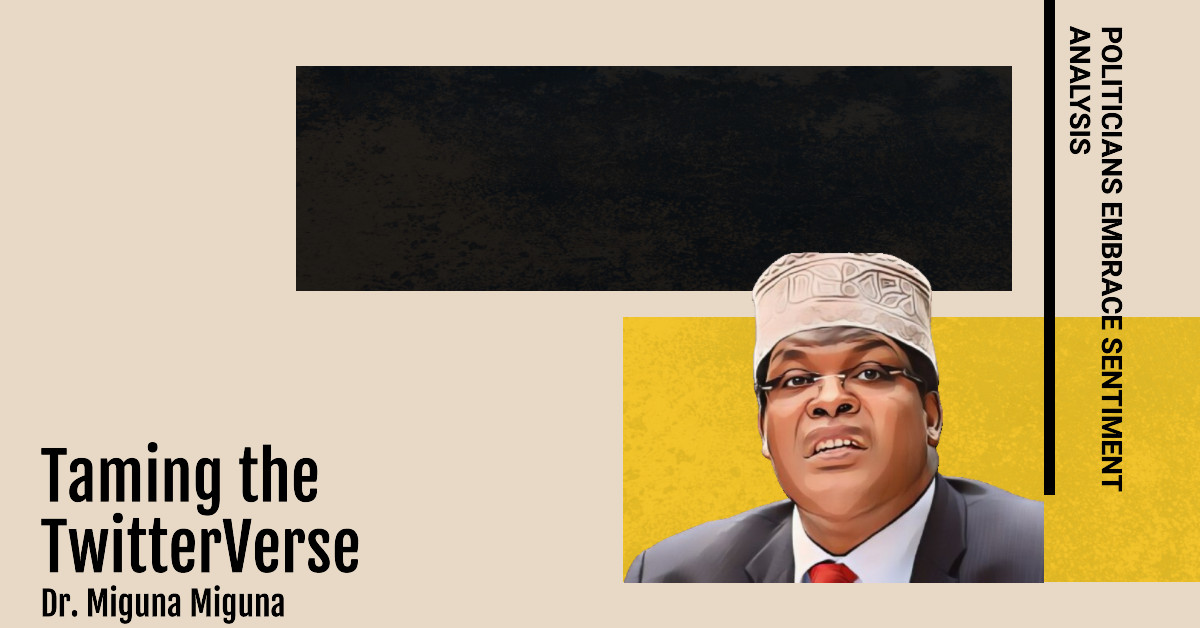

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 15px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'> | </span> </span></b>Defining the Question</b></p></div>

## <b><span style='color:#F1A424'>|</span> Executive Summary:</b> 

**In the dynamic world of politics, public perception plays a crucial role in shaping the success or failure of a political figure. Leveraging the power of social media, particularly Twitter, has become an indispensable tool for political leaders to connect with their constituents, gauge public sentiment, and build a strong brand identity. However, effectively managing and understanding the vast amount of data generated on Twitter can be a daunting task. This is where Twitter sentiment analysis using NLP (Natural Language Processing) emerges as a powerful solution.**

## <b><span style='color:#F1A424'>|</span> Problem Statement:</b> 

**Our client, a prominent political figure, seeks to enhance their brand reputation and strengthen their connection with their followers on Twitter. They recognize the importance of understanding public sentiment and identifying emerging trends in online conversations. However, manually analyzing the sheer volume of tweets directed at their account is a time-consuming and resource-intensive endeavor.**

## <b><span style='color:#F1A424'>|</span> Proposed Solution:</b> 

**We propose implementing a Twitter sentiment analysis NLP project to automatically extract and analyze sentiment from tweets directed from the client's Twitter account. This solution will provide valuable insights into the public's perception of the client's policies, actions, and overall brand image.**

## <b><span style='color:#F1A424'>|</span> Data Pertinence and Attribution:</b> 

**Data Source:**

- Twitter account: Dr. Miguna Miguna (@MigunaMiguna)
- Date range: January 1, 2019 - April 28, 2022
- Number of tweets: 43,479
- Data collection method: Twint, an unofficial Twitter scraper.
- Dataset Link: https://1drv.ms/u/s!Ai_PPIpft10FsDSw2ufEeAfxx8u4?e=c6ebBe


## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>1 |</span></span></b>Data Loading & Preparation</b></p></div>

## <b>1.1 <span style='color:#F1A424'>|</span> Importing Necessary Libraries</b> 

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

## <b>1.2 <span style='color:#F1A424'>|</span>Loading in our Data</b> 

In [2]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# load the dataset just using specific features
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\miguna_latest.csv', usecols=['id', 'date', 'username', 'tweet'])

df.head()

,id,date,username,tweet
0,1519644754077753344,2022-04-28,migunamiguna,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga"
1,1519642090862432258,2022-04-28,migunamiguna,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi."
2,1519350946161217537,2022-04-27,migunamiguna,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?"
3,1519348400671633413,2022-04-27,migunamiguna,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.
4,1519335863456518144,2022-04-27,migunamiguna,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?


## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>2 |</span></span></b> Data Quality Checks</b></p></div>
   
- **Another crucial step in any project involves ensuring the quality of your data. Remember that your model’s performance is directly tied to the data it processes. Therefore, take the time to remove duplicates and handle missing values appropriately.**

- **Here we always check for missing values, outliers and remove any unnecessary variables/features/columns. Since we have text data, outliers cannot be checked.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43478 entries, 0 to 43477
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43478 non-null  int64 
 1   date      43478 non-null  object
 2   username  43478 non-null  object
 3   tweet     43478 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


## <b>2.1 <span style='color:#F1A424'>|</span> Checking for NaN Values</b> 

In [4]:
print(df.isna().sum())
print("*"*40)

id          0
date        0
username    0
tweet       0
dtype: int64
****************************************


**As noted earlier, we don not have any null values.**

## <b>2.2 <span style='color:#F1A424'>|</span> Checking for Sentence Length Consistency</b> 

In [5]:
df['tweet'].apply(len).value_counts()

tweet
280    2222
279    1555
278    1504
277    1297
276    1166
       ... 
458       2
479       2
421       2
369       2
370       2
Name: count, Length: 440, dtype: int64

**This can give you an overview of the number of words per tweet. We also notice that some consist of less then five words hence won't be instrumental in constructing our predictive model.**

In [6]:
sum(df['tweet'].apply(len) > 5) , sum(df['tweet'].apply(len) <= 5)

(43464, 14)

**We have `43464` tweets with characters gretaer than 5 and only `14` tweets with characters less than 5 characters.**

In [7]:
print("Shape of the dataset before filtering:")
print(df.shape)
print("*"*40)
df = df[df['tweet'].apply(len) > 5]
print("Shape of the dataset after filtering:")
print(df.shape)

Shape of the dataset before filtering:
(43478, 4)
****************************************
Shape of the dataset after filtering:
(43464, 4)


## <b>2.3 <span style='color:#F1A424'>|</span> Checking for Duplicates</b> 

In [8]:
print(df.duplicated().sum())
print("*"*40)

21772
****************************************


**We will have to check if indeed these are duplicate values.**

In [9]:
# checking if the duolicate values are indeed duplicates
df[df.duplicated(subset=['tweet'],keep=False)].sort_values(by='tweet').sample(10)

,id,date,username,tweet
8275,1257708489813700618,2020-05-05,migunamiguna,"@nyarondigo @RickMakan You are a disgrace even to your chickens, Baboon. Get off my TL."
5719,1303140942510206976,2020-09-08,migunamiguna,Despot Uhuru Kenyatta must pack up and prepare to go to jail for 650 years together with his UGLY LOOTING CRIMINAL MOTHER NGINA. That's not vulgar. That's not an insult. It is the TRUTH. Anyone who doesn't like it should unfollow me and stop reading my Tweets. #UhuruMustGo
18374,1128682976789827584,2019-05-15,migunamiguna,"@thiararapeter @ochieng_gilbert @RailaOdinga @WilliamsRuto @FredMatiangi @Wetangulam @skmusyoka @MikeSonko @INTERPOL_HQ I've only been on the side of truth, integrity and justice. But you confuse that with being ""pro"" or ""anti"" Raila. Raila is not a AN IDEA or a CAUSE. He is a PERSON. He is the one who surrendered to Uhuru not me. Surrender gave him handcheque while I've been tortured and exiled."
14108,1180952167152324608,2019-10-06,migunamiguna,@anderearden There is no contradiction. Citizenship by birth is not the same as citizenship by naturalization. Some of you are too thick to understand anything.
32245,1229558832835235840,2020-02-18,migunamiguna,"@DCI_Kenya Instead of Kabura's gunny sacks, the crooks simply TRANSFERRED the hundreds of millions of public funds into his accounts. No services rendered. No goods sold. Cold-blooded theft. Just like Humphrey Kariuki, a former Treasury messenger who stole billions from Kenyans."
14008,1183028549256695808,2019-10-12,migunamiguna,....That's what FORENSIC EXAMINERS do. They are not eye witnesses to deaths they solve. We didn't have to be on the Ferry in Mombasa to establish what happened to Amanda and Mariam. Let's find solutions to Kenya's problems using BRAINS that FUNCTION. #DespotsMustFall
33506,1213909933151920129,2020-01-05,migunamiguna,"Don't allow anyone to discourage, distract, compromise or sabotage our liberation and freedom struggle. The organized cabals and so-called dynastic families such as the Kenyatta, Moi and Odinga Families have messed up Kenya and plundered our resources for 56 years. Say #Enough!"
21674,1082387044230483972,2019-01-07,migunamiguna,Heroes fight against oppression. Anyone who surrenders and joins an authoritarian regime like @UKenyatta's rogue regime is not a hero. Those comparing @RailaOdinga's horrible betrayal of the struggle to heroism are like those who consider home-guards of the colonialists heroes.
4668,1361660948038250499,2021-02-16,migunamiguna,"You nailed it, @waikwawanyoike. Waiganjo's verbiage is embarrassing, especially for one who sat at the Committee of Experts. Hopeless like Ekuru Aukot and Otiende Amolo - 2 other Tumbo pseudo-intellectuals. #CartelsMustFall"
20139,1105548520654811138,2019-03-12,migunamiguna,"Poverty, joblessness, brutality, tribalism and murder have been used to inflict fear and division among the 99.9% of Kenyans in order to prevent a revolution. The Burkinabe used these instruments of fear to ENERGIZE their revolution. Kenyans must do so, too. #NationalOilScandals"


In [10]:
df[df['id'] == 1094014959636410368]

,id,date,username,tweet
20988,1094014959636410368,2019-02-08,migunamiguna,Salute!
42687,1094014959636410368,2019-02-08,migunamiguna,Salute!


**We can see that the dataset does indeed contain entries that are duplicate tweets. We will go ahead and drop these duplicate entries although the number of duolicates `21772` accounts for almost half of our data.**

In [11]:
df = df.drop_duplicates()

print(df.duplicated().sum())
print("*"*40)

0
****************************************


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21692 entries, 0 to 21778
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        21692 non-null  int64 
 1   date      21692 non-null  object
 2   username  21692 non-null  object
 3   tweet     21692 non-null  object
dtypes: int64(1), object(3)
memory usage: 847.3+ KB


## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>3 |</span></span></b> Data Preprocessing</b></p></div>

- **Preprocessing procedures are tokenizing(spliting),stemming and lemmatization which are dependent on the model you choose to use.**

## <b>3.1 <span style='color:#F1A424'>|</span> Text Cleaning (Source Text)</b> 
+ Mentions / User handles
+ Hashtags
+ URLs
+ Special Characters
+ Whitespaces
+ Emojis
+ Contractions
+ Stopwords

**For cleaning our text we will be using the NeatText Library. NeatText is a simple NLP package for cleaning textual data and text preprocessing. It offers a variety of features for cleaning unstructured text data, reducing noise (such as special characters and stopwords), and extracting specific information from the text. It can be used via an object-oriented approach or a functional/method-oriented approach, providing flexibility in its usage. The package includes classes such as TextCleaner, TextExtractor, and TextMetrics for different text processing tasks.**

https://pypi.org/project/neattext/

In [13]:
# load the text cleaning packages

import neattext as nt
import neattext.functions as nfx

# Methods and Attributes of the function
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

### <b>3.1.1 <span style='color:#F1A424'>|</span> Mentions / User Handles</b> 

In [14]:
# Noise scan
df['tweet'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0         7.581227
1        12.142857
2        10.447761
3        12.000000
4        12.941176
           ...    
21774    10.238908
21775    11.827957
21776    10.958904
21777    11.913357
21778    12.340426
Name: tweet, Length: 21692, dtype: float64

In [15]:
# Ensure all entries in 'tweet' column are strings
df['tweet'] = df['tweet'].astype(str)

# Now apply the clean_text function
df['clean_tweet'] = df['tweet'].apply(lambda x: nfx.clean_text(x, puncts=False, stopwords=False))

In [16]:
# Extract userhandles into another column before removing them
df['userhandle'] = df['clean_tweet'].apply(nfx.extract_userhandles)

In [17]:
# Remove the userhandles
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_userhandles)

df[['tweet', 'clean_tweet', 'userhandle']].head()

,tweet,clean_tweet,userhandle
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th. #rejectrailaodinga",[]
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","president has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like","[@nelsonhavi, @nelsonhavi.]"
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","you have alleged that ruto has stolen more than uhuru kenyatta. #pandorapapers disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?",[]
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.,"[@senator047, @statehousekenya]"
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,my tweet did not say that some white people are not homeless?,"[@fredrickowok, @elonmusk]"


### <b>3.1.2 <span style='color:#F1A424'>|</span> Hashtags</b> 

In [18]:
# Extract hashtags into another column before removing them
df['hashtags'] = df['clean_tweet'].apply(nfx.extract_hashtags)

df[['tweet', 'clean_tweet', 'hashtags']].head()

,tweet,clean_tweet,hashtags
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th. #rejectrailaodinga",[#rejectrailaodinga]
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","president has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like",[]
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","you have alleged that ruto has stolen more than uhuru kenyatta. #pandorapapers disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?",[#pandorapapers]
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.,[]
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,my tweet did not say that some white people are not homeless?,[]


In [19]:
# Remove hashtags
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_hashtags)

df[['tweet', 'clean_tweet', 'hashtags']].head()

,tweet,clean_tweet,hashtags
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th.",[#rejectrailaodinga]
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","president has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like",[]
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","you have alleged that ruto has stolen more than uhuru kenyatta. disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?",[#pandorapapers]
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,where is credible evidence that it's him? show a time-stamped image with him inside the vehicle.,[]
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,my tweet did not say that some white people are not homeless?,[]


### <b>3.1.3 <span style='color:#F1A424'>|</span> URLs</b> 

In [20]:
# Extract URLs into another column before removing them
# If we were to remove the URLs after remove the special characters e.g '//' the function would be ubable to detect the URLs
df['urls'] = df['clean_tweet'].apply(nfx.extract_urls)

df[['tweet', 'clean_tweet', 'urls']].sample(5)

,tweet,clean_tweet,urls
21200,"@nwm21857450 That's nonsense, Zombie, and you know it.","that's nonsense, zombie, and you know it.",[]
1809,"@Caroo93382885 You must get admitted at a university first, then you apply for a scholarship, or you get one after admission if you have exceptional GPA.","you must get admitted at a university first, then you apply for a scholarship, or you get one after admission if you have exceptional gpa.",[]
7743,"I should have added the the one that committed suicide first: Devolved Units or County Governments. Dead, cremated and forgotten. That's why we have illiterate military men occupying Nairobi by force. #uhurumustgo","i should have added the the one that committed suicide first: devolved units or county governments. dead, cremated and forgotten. that's why we have illiterate military men occupying nairobi by force.",[]
18110,"@werejac @_fels1 @ProseocutaDenis @Babu_Owino @RailaOdinga @WilliamsRuto @DCI_Kenya @ODPP_KE @Wetangulam @FredMatiangi @EACCKenya There is a very good reason why we have the Bill of Rights in the Constitution, especially freedom of conscience, thought, expression and the media. These are to permit ROBUST public discourse and debates. You are afraid to confront despots in power. I'm not.","there is a very good reason why we have the bill of rights in the constitution, especially freedom of conscience, thought, expression and the media. these are to permit robust public discourse and debates. you are afraid to confront despots in power. i'm not.",[]
17016,"Yes, I'm an unrepentant freedom fighter. That's my work. I fight for freedom even in my sleep. If anyone believes that fighting for freedom is not work, that's his/her problem; not mine. I'll continue fighting for your freedom whether I'm in exile or at home even if you abuse me.","yes, i'm an unrepentant freedom fighter. that's my work. i fight for freedom even in my sleep. if anyone believes that fighting for freedom is not work, that's his/her problem; not mine. i'll continue fighting for your freedom whether i'm in exile or at home even if you abuse me.",[]


In [21]:
df[['tweet', 'clean_tweet', 'urls']].loc[15]

tweet          Bravo, Wanyiri Kihoro. I fully support your principled stand.   https://t.co/7d61DoxdQn
clean_tweet      bravo, wanyiri kihoro. i fully support your principled stand. https://t.co/7d61doxdqn
urls                                                                         [https://t.co/7d61doxdqn]
Name: 15, dtype: object

In [22]:
df[['tweet', 'clean_tweet', 'urls']].loc[16515]

tweet          @brexit_martin @Anko_geof @EAukot @IEBCKenya Wrong. The solution is only one: People Power Protests!   https://t.co/4etcW9LBLc
clean_tweet                                                   wrong. the solution is only one: people power protests! https://t.co/4etcw9lblc
urls                                                                                                                [https://t.co/4etcw9lblc]
Name: 16515, dtype: object

In [23]:
df[['tweet', 'clean_tweet', 'urls']].loc[12827]

tweet          Con-Man @RailaOdinga sycophants have been abusing me for telling them that Despot Kenyatta had castrated them, numbed their brains and made them into zombies. Apologize to Kenyans for stealing Sh 11 Billion. Apologize for polluting air. #BurnBBIReport    https://t.co/7Qjg6eg1xV
clean_tweet                               con-man   sycophants have been abusing me for telling them that despot kenyatta had castrated them, numbed their brains and made them into zombies. apologize to kenyans for stealing sh 11 billion. apologize for polluting air.   https://t.co/7qjg6eg1xv
urls                                                                                                                                                                                                                                                                        [https://t.co/7qjg6eg1xv]
Name: 12827, dtype: object

In [24]:
# Remove URLS
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [25]:
df[['tweet', 'clean_tweet', 'urls']].loc[15]

tweet          Bravo, Wanyiri Kihoro. I fully support your principled stand.   https://t.co/7d61DoxdQn
clean_tweet                             bravo, wanyiri kihoro. i fully support your principled stand. 
urls                                                                         [https://t.co/7d61doxdqn]
Name: 15, dtype: object

### <b>3.1.4 <span style='color:#F1A424'>|</span> Special Characters</b> 

In [26]:
# Remove special characters

df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

df[['tweet', 'clean_tweet']].sample(5)

,tweet,clean_tweet
15414,"@ntvkenya This crow-eating despotic surrogate criminal suffers from the Nicholas Biwott syndrome of deluding himself that he is the cabinet minister for everything - environment, torture, political assassinations, election theft and Nairobi River! #DespotsMustFall",this croweating despotic surrogate criminal suffers from the nicholas biwott syndrome of deluding himself that he is the cabinet minister for everything environment torture political assassinations election theft and nairobi river
9201,Even a blind (wo)man can see that Despot Uhuru Kenyatta has sent @WilliamsRuto into internal forced #COVIDー19 exile. Both @realDonaldTrump and Pence have been appearing together in public. Trump appointed Pence the head of the #COVID19 task-force. Ruto: Deal with the reality.,even a blind woman can see that despot uhuru kenyatta has sent into internal forced exile both and pence have been appearing together in public trump appointed pence the head of the taskforce ruto deal with the reality
15381,"Despot Uhuru Kenyatta and his Kiambu Mafia are only desperate to use the People's Con-Man @RailaOdinga to pass the BBI HandChieth constitutional amendment intended to institutional despotism. If/when passed, @RailaOdinga will wish that he never recovered from his brain illness.",despot uhuru kenyatta and his kiambu mafia are only desperate to use the peoples conman to pass the bbi handchieth constitutional amendment intended to institutional despotism ifwhen passed will wish that he never recovered from his brain illness
20651,"@ReallyFinance ""Big evil agriculture and capitalism"" IS politics! Logic 101!",big evil agriculture and capitalism is politics logic 101
8000,If expulsion from a political briefcase outlet like Jubilee and banishment from parliamentary committees is the punishment for those who refuse to be muzzled and enslaved then A FIRING SQUAD is a just punishment for Despot Uhuru Kenyatta who has TERRORIZED KENYANS for 7 years.,if expulsion from a political briefcase outlet like jubilee and banishment from parliamentary committees is the punishment for those who refuse to be muzzled and enslaved then a firing squad is a just punishment for despot uhuru kenyatta who has terrorized kenyans for 7 years


### <b>3.1.5 <span style='color:#F1A424'>|</span> Multiple Whitespaces</b> 

In [27]:
# Remove whitespaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga",despot uhuru kenyattas olympian performance is in drinking and looting dens and funeral committees of fallen thieves tribalists and dictators thats his 10 year legacy kenyans must and will remember and punish him for that dubious legacy on august 9th
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.",president has been my lawyer we dont agree on many issues however he will be the best mp for westlands tim wanyonyi may be a good man but he is a coward and has never legislated in parliament parliament deserves eloquent and brilliant warriors like
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?",you have alleged that ruto has stolen more than uhuru kenyatta disclose that uhuru kenyatta has stolen and stashed more than sh 25 trillion in 9 nine years from your argument it implies that ruto is a trillionaire is he broke or genuinely mourning
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,where is credible evidence that its him show a timestamped image with him inside the vehicle
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,my tweet did not say that some white people are not homeless


### <b>3.1.6 <span style='color:#F1A424'>|</span> Emojis</b> 

In [28]:
# Remove emojis
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)

df[['tweet', 'clean_tweet']].sample(5)

,tweet,clean_tweet
15297,"@Hon_Brayo Join, stay disciplined, focused, fearless and fully committed. Viva! #despotsmustfall",join stay disciplined focused fearless and fully committed viva
14674,"@antifragilistaa Fictional characters represent what? Kunta Kinte, Okonkwo or Amalinze the Cat were once real PEOPLE whose identities were concealed for artistic reasons unless you don't understand literature. Alex Haley or Achebe did not create Kunta Kinte or Okonkwo. They told their stories.",fictional characters represent what kunta kinte okonkwo or amalinze the cat were once real people whose identities were concealed for artistic reasons unless you dont understand literature alex haley or achebe did not create kunta kinte or okonkwo they told their stories
2296,"When even the @IEBCKenya chairman, Wafula Chebukati, exhibits more COURAGE than the Chief Justice of the Republic and President of the Supreme Court by removing himself from the National Multi-Sectoral Consultative Forum on ELECTION THEFT, we know that the Despot is CORNERED.",when even the chairman wafula chebukati exhibits more courage than the chief justice of the republic and president of the supreme court by removing himself from the national multisectoral consultative forum on election theft we know that the despot is cornered
19659,@EricAshanda @gathara @DavidNdii Books are published to be sold and read. I've not stopped anyone from publishing and selling theirs.,books are published to be sold and read ive not stopped anyone from publishing and selling theirs
14001,"@WafulahC Car owners do that daily. They park their vehicles even in recreational parks and sit at the back. The same thing she did. The stupid idea of ""retreat"" is childish. No one can ""retreat"" when the vehicle is sinking and the people inside the vehicle are drowning. Think!",car owners do that daily they park their vehicles even in recreational parks and sit at the back the same thing she did the stupid idea of retreat is childish no one can retreat when the vehicle is sinking and the people inside the vehicle are drowning think


### <b>3.1.7 <span style='color:#F1A424'>|</span> Contractions</b> 

In [29]:
import contractions

# Apply the contractions.fix function to the clean_tweet column
df['clean_tweet'] = df['clean_tweet'].apply(contractions.fix)

df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga",despot uhuru kenyattas olympian performance is in drinking and looting dens and funeral committees of fallen thieves tribalists and dictators that is his 10 year legacy kenyans must and will remember and punish him for that dubious legacy on august 9th
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.",president has been my lawyer we do not agree on many issues however he will be the best mp for westlands tim wanyonyi may be a good man but he is a coward and has never legislated in parliament parliament deserves eloquent and brilliant warriors like
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?",you have alleged that ruto has stolen more than uhuru kenyatta disclose that uhuru kenyatta has stolen and stashed more than sh 25 trillion in 9 nine years from your argument it implies that ruto is a trillionaire is he broke or genuinely mourning
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,where is credible evidence that its him show a timestamped image with him inside the vehicle
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,my tweet did not say that some white people are not homeless


### <b>3.1.8 <span style='color:#F1A424'>|</span> Stopwords</b> 

In [30]:
# Extract stopwords
df['clean_tweet'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0                                                 [is, in, and, and, of, and, that, is, his, must, and, will, and, him, for, that, on]
1        [has, been, my, we, do, not, on, many, however, he, will, be, the, for, may, be, a, but, he, is, a, and, has, never, in, and]
2                    [you, have, that, has, more, than, that, has, and, more, than, in, nine, from, your, it, that, is, a, is, he, or]
3                                                                                 [where, is, that, its, him, show, a, with, him, the]
4                                                                                            [my, did, not, say, that, some, are, not]
                                                                     ...                                                              
21774            [those, were, not, they, were, within, the, not, every, is, and, by, anyone, who, the, in, and, do, not, what, a, is]
21775     [the, only, i, are, those, of, and, the, only

In [31]:
# Remove the stop words

df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga",despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.",president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?",alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,credible evidence timestamped image inside vehicle
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,tweet white people homeless


In [32]:
# Noise Scan after cleaning text
df['clean_tweet'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0        0
1        0
2        0
3        0
4        0
        ..
21774    0
21775    0
21776    0
21777    0
21778    0
Name: clean_tweet, Length: 21692, dtype: int64

## <b>3.2 <span style='color:#F1A424'>|</span> Linguistic Processing (Clean Text)</b> 

+ Tokenization
+ Stemming / Lemmatization
+ Parts of Speech Tagging
+ Calculating Sentiment Based on Polarity & Subjectivity

### <b>3.2.1 <span style='color:#F1A424'>|</span> Tokenization</b> 

In [33]:
test_sample = df['clean_tweet'].loc[12827]

test_sample

'conman sycophants abusing telling despot kenyatta castrated numbed brains zombies apologize kenyans stealing sh 11 billion apologize polluting air'

In [34]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

tokenizer.tokenize(test_sample)

['conman',
 'sycophants',
 'abusing',
 'telling',
 'despot',
 'kenyatta',
 'castrated',
 'numbed',
 'brains',
 'zombies',
 'apologize',
 'kenyans',
 'stealing',
 'sh',
 '11',
 'billion',
 'apologize',
 'polluting',
 'air']

In [35]:
# Tokenise the clean_tweet column
df['preprocessed_tweet'] = df['clean_tweet'].apply(lambda x: tokenizer.tokenize(x))

# df.iloc[100]["preprocessed_tweet"][:20]

In [36]:
df[['clean_tweet', 'preprocessed_tweet']].iloc[100]

clean_tweet                           impunity sycophants tell despot uhuru kenyatta young going main target conman telling conman old cowardly
preprocessed_tweet    [impunity, sycophants, tell, despot, uhuru, kenyatta, young, going, main, target, conman, telling, conman, old, cowardly]
Name: 180, dtype: object

### <b>3.2.2 <span style='color:#F1A424'>|</span> Lemmatization</b> 

In [37]:
# Define a function to lemmatise the tokens
def lemmatise_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatise the tokens
df['lemma_preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: lemmatise_tokens(x))

# df.iloc[100]["preprocessed_tweet"][:20]
    

In [38]:
df[['clean_tweet', 'lemma_preprocessed_tweet']].iloc[260]

clean_tweet                                     memo despot uhuru kenyatta 21st century 18th 80 voters youth women 70 year old kikuyu men carrying circumcision knives surrender failed
lemma_preprocessed_tweet    [memo, despot, uhuru, kenyatta, 21st, century, 18th, 80, voter, youth, woman, 70, year, old, kikuyu, men, carrying, circumcision, knife, surrender, failed]
Name: 340, dtype: object

In [39]:
# Define a function to stem the tokens
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Stem the tokens
df['stemma_preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: stem_tokens(x))

# df.iloc[100]["preprocessed_tweet"][:20]

In [40]:
df[['clean_tweet', 'stemma_preprocessed_tweet']].iloc[200]

clean_tweet                     trying untangle conspiracy question ask answer gained scheme fictitious attack conman soy intended gain sympathy votes unfortunately 1000000 miles ahead
stemma_preprocessed_tweet    [tri, untangl, conspiraci, question, ask, answer, gain, scheme, fictiti, attack, conman, soy, intend, gain, sympathi, vote, unfortun, 1000000, mile, ahead]
Name: 280, dtype: object

### <b>3.2.3 <span style='color:#F1A424'>|</span> Calculating Sentiment Based on Polarity & Subjectivity</b>

TextBlob is a Python library for processing textual data, including sentiment analysis. It uses natural language processing (NLP) and the Natural Language Toolkit (NLTK) to achieve its tasks. When a sentence is passed into TextBlob, it returns two outputs: polarity and subjectivity. The polarity score is a float within the range [-1, 1], where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity score is a float within the range, where 0 is very objective and 1 is very subjective.

In [41]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df[['clean_tweet','Subjectivity','Polarity']].head()

,clean_tweet,Subjectivity,Polarity
0,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,0.000000,0.000000
1,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,0.633333,0.866667
2,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning,0.300000,0.150000
3,credible evidence timestamped image inside vehicle,0.700000,0.400000
4,tweet white people homeless,0.000000,0.000000


In [42]:
# Create a function to compute the negative, positive and nuetral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['sentiment'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df[['clean_tweet','Subjectivity','Polarity','sentiment']].head()

,clean_tweet,Subjectivity,Polarity,sentiment
0,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,0.000000,0.000000,Neutral
1,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,0.633333,0.866667,Positive
2,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning,0.300000,0.150000,Positive
3,credible evidence timestamped image inside vehicle,0.700000,0.400000,Positive
4,tweet white people homeless,0.000000,0.000000,Neutral


In [43]:
df['sentiment'].value_counts()

sentiment
Neutral     8888
Positive    6472
Negative    6332
Name: count, dtype: int64

In [44]:
# # using VADER
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyser = SentimentIntensityAnalyzer()

# # Create a function to get the sentiment scores
# def sentiment_analyzer_scores(text):
#     score = analyser.polarity_scores(text)
#     return score

# # Get the compound sentiment scores
# df['compound_sentiment'] = df['clean_tweet'].apply(lambda x: sentiment_analyzer_scores(x)['compound'])

# # Get the sentiment scores whereby there is positive, negative and neutral sentiment
# df['sentiment'] = df['compound_sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# df[['clean_tweet', 'compound_sentiment', 'sentiment']].head()

In [45]:
# df['sentiment'].value_counts()

In [46]:
df['preprocessed_tweet']

0        [despot, uhuru, kenyattas, olympian, performance, drinking, looting, dens, funeral, committees, fallen, thieves, tribalists, dictators, 10, year, legacy, kenyans, remember, punish, dubious, legacy, august, 9th]
1                                              [president, lawyer, agree, issues, best, mp, westlands, tim, wanyonyi, good, man, coward, legislated, parliament, parliament, deserves, eloquent, brilliant, warriors, like]
2                                          [alleged, ruto, stolen, uhuru, kenyatta, disclose, uhuru, kenyatta, stolen, stashed, sh, 25, trillion, years, argument, implies, ruto, trillionaire, broke, genuinely, mourning]
3                                                                                                                                                                 [credible, evidence, timestamped, image, inside, vehicle]
4                                                                                                                       

In [47]:
df['lemma_preprocessed_tweet'] = df['lemma_preprocessed_tweet'].apply(lambda x: ' '.join(x))

In [48]:
df['stemma_preprocessed_tweet'] = df['stemma_preprocessed_tweet'].apply(lambda x: ' '.join(x))

df['preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: ' '.join(x))

In [49]:
df['preprocessed_tweet']

0        despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th
1                                          president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like
2                                       alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion years argument implies ruto trillionaire broke genuinely mourning
3                                                                                                                                               credible evidence timestamped image inside vehicle
4                                                                                                                                                                      tweet white people homeless
                         

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21692 entries, 0 to 21778
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21692 non-null  int64  
 1   date                       21692 non-null  object 
 2   username                   21692 non-null  object 
 3   tweet                      21692 non-null  object 
 4   clean_tweet                21692 non-null  object 
 5   userhandle                 21692 non-null  object 
 6   hashtags                   21692 non-null  object 
 7   urls                       21692 non-null  object 
 8   preprocessed_tweet         21692 non-null  object 
 9   lemma_preprocessed_tweet   21692 non-null  object 
 10  stemma_preprocessed_tweet  21692 non-null  object 
 11  Subjectivity               21692 non-null  float64
 12  Polarity                   21692 non-null  float64
 13  sentiment                  21692 non-null  object 


In [78]:
# save the dataframe to csv using the name 'interim_data.csv' fo the data folder
# df.to_csv('interim_data.csv', index=False)